<font size="5">
 <div class="alert alert-block alert-info"><b>Master in Data Science - Iscte <b>
     </div>
</font> 
 
 
     
    
  <font size="5"> OEOD </font>
  
  
  
  <font size="3"> **Diana Aldea Mendes**, October 2023 </font>
  
   
  <font size="3"> *diana.mendes@iscte-iul.pt* </font> 
  
    
 
  
    
  <font color='blue'><font size="5"> <b>Week 3 - Value and Policy Iteration<b></font></font>


##################################################################
##################################################################

- This code was inspired/adapted from https://github.com/berkeleydeeprlcourse/homework/

# MDP and FrozenLake environments

- core utilities to run RL cases


In [11]:
# #@title Envronments and Plot functions {display-mode: "form"}

import sys, os
if 'google.colab' in sys.modules and not os.path.exists('.setup_complete'):
    !wget -q https://raw.githubusercontent.com/yandexdataschool/Practical_RL/master/setup_colab.sh -O- | bash
    !wget -q https://raw.githubusercontent.com/yandexdataschool/Practical_RL/master/week02_value_based/mdp.py
    !touch .setup_complete

# This code creates a virtual display to draw game images on.
# It will have no effect if your machine has a monitor.
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY")) == 0:
    !bash ../xvfb start
    os.environ['DISPLAY'] = ':1'

In [12]:
## import libraries

import random
import numpy as np

# high-quality figures
%config InlineBackend.figure_format = 'svg'

## Markov decision process

- Markov Decision Processes - a MDP is defined by how it changes states and how rewards are computed.

- State transition is defined by $P(s' |s,a)$ - how likely are you to end at state $s'$ if you take action $a$ from state $s$. 
- Now there's more than one way to define rewards, but we'll use $r(s,a,s')$ function for convenience.

- _This notebook is inspired by the awesome_ [CS294](https://github.com/berkeleydeeprlcourse/homework/tree/master/sp17_hw/hw2) _by Berkeley_



In [13]:
pip install gym

Defaulting to user installation because normal site-packages is not writeable


Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install graphviz

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [15]:
from mdp import *

In [16]:
from mdp import MDP

# define transition probabilities
transition_probs = {
    's0': {
        'a0': {'s0': 0.5, 's2': 0.5},
        'a1': {'s2': 1}
    },
    's1': {
        'a0': {'s0': 0.7, 's1': 0.1, 's2': 0.2},
        'a1': {'s1': 0.95, 's2': 0.05}
    },
    's2': {
        'a0': {'s0': 0.4, 's2': 0.6},
        'a1': {'s0': 0.3, 's1': 0.3, 's2': 0.4}
    }
}
rewards = {
    's1': {'a0': {'s0': +5}},
    's2': {'a1': {'s0': -1}}
}

##########################################################################

# MDP is the modulos/library we use (a set of functions we call below) - from GitHub
# We can use MDP just as any other gym environment

# so, we define MDP based on Transition prob, rewards and initial state
mdp = MDP(transition_probs, rewards, initial_state='s0')

In [17]:
## print some info about MDP
print('initial state =', mdp.reset())
next_state, reward, done, info = mdp.step('a1')
print('next_state = %s, reward = %s, done = %s' % (next_state, reward, done))

initial state = s0
next_state = s2, reward = 0.0, done = False


In [18]:
print("mdp.get_all_states =", mdp.get_all_states())
print("mdp.get_possible_actions('s1') = ", mdp.get_possible_actions('s1'))
print("mdp.get_next_states('s1', 'a0') = ", mdp.get_next_states('s1', 'a0'))
print("mdp.get_reward('s1', 'a0', 's0') = ", mdp.get_reward('s1', 'a0', 's0'))
print("mdp.get_transition_prob('s1', 'a0', 's0') = ",
      mdp.get_transition_prob('s1', 'a0', 's0'))

mdp.get_all_states = ('s0', 's1', 's2')
mdp.get_possible_actions('s1') =  ('a0', 'a1')
mdp.get_next_states('s1', 'a0') =  {'s0': 0.7, 's1': 0.1, 's2': 0.2}
mdp.get_reward('s1', 'a0', 's0') =  5
mdp.get_transition_prob('s1', 'a0', 's0') =  0.7


## Visualizing MDPs

In [19]:
from mdp import has_graphviz

## use IPython library to visualize images
from IPython.display import display
print("Graphviz available:", has_graphviz)

Graphviz available: True


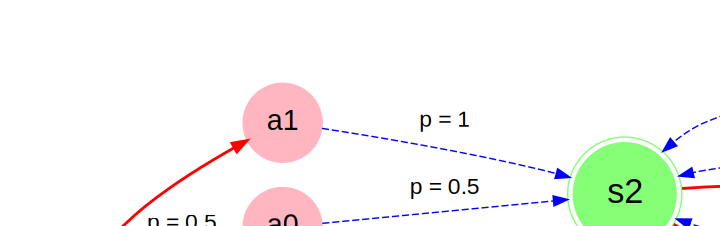

In [20]:
from mdp import plot_graph, has_graphviz

## visualize mdp
if has_graphviz:
    display(plot_graph(mdp))

# Value Iteration

- Now let's build something to solve this MDP. 
- The simplest algorithm so far is **Value Iteration (VI)**

- **Pseudo-code for VI**:

----
 1. Initialize $V_0(s) = 0$,   for all $s$ in $S$
 2. For $i = 0, 1, 2, ... $
 3. Compute: $V_{i+1}(s) = \max_a \sum_{s'} P(s' | s, a) [ r (s, a, s') + \gamma V_i (s')] \quad,  \forall s \in S$
    
----

`def get_action_value(mdp, state_values, state, action, gamma):`

 ` """ Computes Q(s,a) as in formula above """`

   ``# YOUR CODE HERE``
  
   `return < YOUR CODE >`
  


In [21]:
def get_action_value(mdp, state_values, state, action, gamma):
    q_value = 0
    for next_state in mdp.get_all_states():
        transition_prob = mdp.get_transition_prob(state, action, next_state)
        reward = mdp.get_reward(state, action, next_state)
        q_value += transition_prob * (reward + gamma * state_values[next_state])
    return q_value

- Using $Q(s,a)$ we can now define the "next" $V(s)$ for value iteration

$$ V_{i+1} (s) = \max_a \sum_{s'} P(s' | s, a) [r(s, a, s') + \gamma V_i(s')] = \max_a Q_i(s, a)  $$


`def get_new_state_value(mdp, state_values, state, gamma):`

   ` """Computes next V(s) as in formula above.`
  `Please do not change state_values in process."""`
  
  
  `if mdp.is_terminal(state):
      return 0`

  ` <YOUR CODE>
  return`


In [22]:
def get_new_state_value(mdp, state_values, state, gamma):
    if mdp.is_terminal(state):
        return 0

    new_state_value = 0
    for action in mdp.get_possible_actions(state):
        q_value = get_action_value(mdp, state_values, state, action, gamma)
        new_state_value = max(new_state_value, q_value)  # Compute max Q-value over all possible actions
    return new_state_value

## Find optimal policy using Value function

- Now let's use those $V^{*}(s)$ to find optimal actions in each state

$$ \pi^*(s) = arg\max_a \sum_{s'} P(s' | s, a) [ r(s,a,s') + \gamma V_i(s')] = arg\max_a Q_i(s,a)$$

- The only difference vs V(s) iteration is that here we take not max but argmax: find action such with maximum Q(s,a).

`def get_optimal_action(mdp, state_values, state, gamma=0.9):`

  `""" Finds optimal action using formula above. """`
  
  `if mdp.is_terminal(state):
      return None`

  `<YOUR CODE HERE>
  return < YOUR CODE >`

In [23]:
def get_action_value(mdp, state_values, state, action, gamma):
    """ Computes Q(s,a) """

    action_states_values = []
    for next_state, proba in mdp.get_next_states(state, action).items():
        immediate_reward = mdp.get_reward(state, action, next_state)
        delayed_reward = state_values[next_state]
        action_states_values.append(proba * (immediate_reward + gamma * delayed_reward))

    return np.sum(action_states_values)

In [24]:
import numpy as np
test_Vs = {s: i for i, s in enumerate(sorted(mdp.get_all_states()))}
assert np.isclose(get_action_value(mdp, test_Vs, 's2', 'a1', 0.9), 0.69)
assert np.isclose(get_action_value(mdp, test_Vs, 's1', 'a0', 0.9), 3.95)

In [25]:
def get_new_state_value(mdp, state_values, state, gamma):
    """ Computes next V(s) as in formula above. Please do not change state_values in process. """
    if mdp.is_terminal(state):
        return 0

    state_actions_values = []
    for action in mdp.get_possible_actions(state):
        state_actions_values.append(get_action_value(mdp, state_values, state, action, gamma))

    return np.max(state_actions_values)

In [26]:
test_Vs_copy = dict(test_Vs)
assert np.isclose(get_new_state_value(mdp, test_Vs, 's0', 0.9), 1.8)
assert np.isclose(get_new_state_value(mdp, test_Vs, 's2', 0.9), 1.08)
assert np.isclose(get_new_state_value(mdp, {'s0': -1e10, 's1': 0, 's2': -2e10}, 's0', 0.9), -13500000000.0), \
    "Please ensure that you handle negative Q-values of arbitrary magnitude correctly"
assert test_Vs == test_Vs_copy, "Please do not change state_values in get_new_state_value"

In [27]:
# parameters
gamma = 0.9            # discount for MDP
num_iter = 100         # maximum iterations, excluding initialization
# stop VI if new values are this close to old values (or closer)
min_difference = 0.001

# initialize V(s)
state_values = {s: 0 for s in mdp.get_all_states()}


for i in range(num_iter):

    # Compute new state values using the functions you defined above.
    # It must be a dict {state : float V_new(state)}
    new_state_values = {state: get_new_state_value(mdp, state_values, state, gamma) for state in state_values.keys()}

    assert isinstance(new_state_values, dict)

    # Compute difference
    diff = max(abs(new_state_values[s] - state_values[s])
               for s in mdp.get_all_states())
    print("iter %4i   |   diff: %6.5f   |   " % (i, diff), end="")
    print('   '.join("V(%s) = %.3f" % (s, v) for s, v in state_values.items()))
    state_values = new_state_values

    if diff < min_difference:
        print("Terminated")
        break
    

iter    0   |   diff: 3.50000   |   V(s0) = 0.000   V(s1) = 0.000   V(s2) = 0.000
iter    1   |   diff: 0.64500   |   V(s0) = 0.000   V(s1) = 3.500   V(s2) = 0.000
iter    2   |   diff: 0.58050   |   V(s0) = 0.000   V(s1) = 3.815   V(s2) = 0.645
iter    3   |   diff: 0.43582   |   V(s0) = 0.581   V(s1) = 3.959   V(s2) = 0.962
iter    4   |   diff: 0.30634   |   V(s0) = 0.866   V(s1) = 4.395   V(s2) = 1.272
iter    5   |   diff: 0.27571   |   V(s0) = 1.145   V(s1) = 4.670   V(s2) = 1.579
iter    6   |   diff: 0.24347   |   V(s0) = 1.421   V(s1) = 4.926   V(s2) = 1.838
iter    7   |   diff: 0.21419   |   V(s0) = 1.655   V(s1) = 5.169   V(s2) = 2.075
iter    8   |   diff: 0.19277   |   V(s0) = 1.868   V(s1) = 5.381   V(s2) = 2.290
iter    9   |   diff: 0.17327   |   V(s0) = 2.061   V(s1) = 5.573   V(s2) = 2.481
iter   10   |   diff: 0.15569   |   V(s0) = 2.233   V(s1) = 5.746   V(s2) = 2.654
iter   11   |   diff: 0.14012   |   V(s0) = 2.389   V(s1) = 5.902   V(s2) = 2.810
iter   12   |   

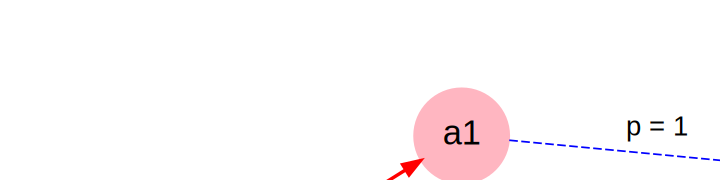

In [28]:
from mdp import plot_graph_with_state_values

if has_graphviz:
    display(plot_graph_with_state_values(mdp, state_values))

In [29]:
print("Final state values:", state_values)

assert abs(state_values['s0'] - 3.781) < 0.01
assert abs(state_values['s1'] - 7.294) < 0.01
assert abs(state_values['s2'] - 4.202) < 0.01

Final state values: {'s0': 3.7810348735476405, 's1': 7.294006423867229, 's2': 4.202140275227048}


In [30]:
def get_optimal_action(mdp, state_values, state, gamma=0.9):
    """ Finds optimal action using formula above. """
    if mdp.is_terminal(state):
        return None

    actions = mdp.get_possible_actions(state)
    action_value = {action: get_action_value(mdp, state_values, state, action, gamma) for action in actions}
    # print(action_value)
    optimal_action = sorted(action_value, key=lambda x: action_value[x], reverse=True)
    # print(optimal_action)
    optimal_action = optimal_action[0]

    return optimal_action
     

In [31]:
assert get_optimal_action(mdp, state_values, 's0', gamma) == 'a1'
assert get_optimal_action(mdp, state_values, 's1', gamma) == 'a0'
assert get_optimal_action(mdp, state_values, 's2', gamma) == 'a1'

assert get_optimal_action(mdp, {'s0': -1e10, 's1': 0, 's2': -2e10}, 's0', 0.9) == 'a0', \
    "Please ensure that you handle negative Q-values of arbitrary magnitude correctly"
assert get_optimal_action(mdp, {'s0': -2e10, 's1': 0, 's2': -1e10}, 's0', 0.9) == 'a1', \
    "Please ensure that you handle negative Q-values of arbitrary magnitude correctly"

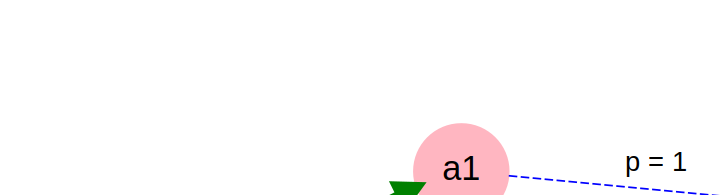

In [32]:
from mdp import has_graphviz, plot_graph_optimal_strategy_and_state_values, get_optimal_action_for_plot

if has_graphviz:
    try:
        display(plot_graph_optimal_strategy_and_state_values(mdp, state_values, get_action_value))
    except ImportError:
        raise ImportError("Run the cell that starts with \"%%writefile mdp_get_action_value.py\"")

In [33]:
# Measure agent's average reward

s = mdp.reset()
rewards = []
for _ in range(10000):
    s, r, done, _ = mdp.step(get_optimal_action(mdp, state_values, s, gamma))
    rewards.append(r)

print("average reward: ", np.mean(rewards))

assert(0.40 < np.mean(rewards) < 0.55)

average reward:  0.486


# Example - Frozen Lake

In [34]:
from mdp import FrozenLakeEnv

mdp = FrozenLakeEnv(slip_chance=0)

mdp.render()

*FFF
FHFH
FFFH
HFFG



In [35]:
def value_iteration(mdp, state_values=None, gamma=0.9, num_iter=1000, min_difference=1e-5):
    """ performs num_iter value iteration steps starting from state_values. Same as before but in a function """
    state_values = state_values or {s: 0 for s in mdp.get_all_states()}
    for i in range(num_iter):

        # Compute new state values using the functions you defined above. It must be a dict {state : new_V(state)}
        # new_state_values = <YOUR CODE HERE >
        new_state_values = { s : get_new_state_value(mdp, state_values, s, gamma)
                         for s in mdp.get_all_states()}


        assert isinstance(new_state_values, dict)

        # Compute difference
        diff = max(abs(new_state_values[s] - state_values[s])
                   for s in mdp.get_all_states())

        print("iter %4i   |   diff: %6.5f   |   V(start): %.3f " %
              (i, diff, new_state_values[mdp._initial_state]))

        state_values = new_state_values
        if diff < min_difference:
            break

    return state_values

In [36]:
state_values = value_iteration(mdp)

iter    0   |   diff: 1.00000   |   V(start): 0.000 
iter    1   |   diff: 0.90000   |   V(start): 0.000 
iter    2   |   diff: 0.81000   |   V(start): 0.000 
iter    3   |   diff: 0.72900   |   V(start): 0.000 
iter    4   |   diff: 0.65610   |   V(start): 0.000 
iter    5   |   diff: 0.59049   |   V(start): 0.590 
iter    6   |   diff: 0.00000   |   V(start): 0.590 


In [37]:

s = mdp.reset()
mdp.render()
for t in range(100):
    a = get_optimal_action(mdp, state_values, s, gamma)
    print(a, end='\n\n')
    s, r, done, _ = mdp.step(a)
    mdp.render()
    if done:
        break

*FFF
FHFH
FFFH
HFFG

down

SFFF
*HFH
FFFH
HFFG

down

SFFF
FHFH
*FFH
HFFG

right

SFFF
FHFH
F*FH
HFFG

down

SFFF
FHFH
FFFH
H*FG

right

SFFF
FHFH
FFFH
HF*G

right

SFFF
FHFH
FFFH
HFF*



## Let's visualize!
It's usually interesting to see what your algorithm actually learned under the hood. To do so, we'll plot state value functions and optimal actions at each VI step.

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline


def draw_policy(mdp, state_values):
    plt.figure(figsize=(3, 3))
    h, w = mdp.desc.shape
    states = sorted(mdp.get_all_states())
    V = np.array([state_values[s] for s in states])
    Pi = {s: get_optimal_action(mdp, state_values, s, gamma) for s in states}
    plt.imshow(V.reshape(w, h), cmap='gray', interpolation='none', clim=(0, 1))
    ax = plt.gca()
    ax.set_xticks(np.arange(h)-.5)
    ax.set_yticks(np.arange(w)-.5)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    Y, X = np.mgrid[0:4, 0:4]
    a2uv = {'left': (-1, 0), 'down': (0, -1), 'right': (1, 0), 'up': (-1, 0)}
    for y in range(h):
        for x in range(w):
            plt.text(x, y, str(mdp.desc[y, x].item()),
                     color='g', size=12,  verticalalignment='center',
                     horizontalalignment='center', fontweight='bold')
            a = Pi[y, x]
            if a is None:
                continue
            u, v = a2uv[a]
            plt.arrow(x, y, u*.3, -v*.3, color='m',
                      head_width=0.1, head_length=0.1)
    plt.grid(color='b', lw=2, ls='-')
    plt.show()

after iteration 0
iter    0   |   diff: 1.00000   |   V(start): 0.000 


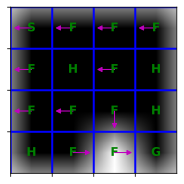

after iteration 1
iter    0   |   diff: 0.90000   |   V(start): 0.000 


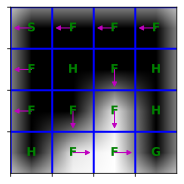

after iteration 2
iter    0   |   diff: 0.81000   |   V(start): 0.000 


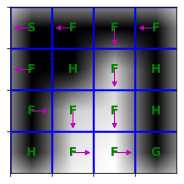

after iteration 3
iter    0   |   diff: 0.72900   |   V(start): 0.000 


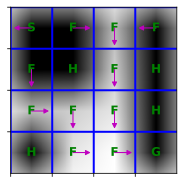

after iteration 4
iter    0   |   diff: 0.65610   |   V(start): 0.000 


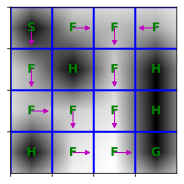

after iteration 5
iter    0   |   diff: 0.59049   |   V(start): 0.590 


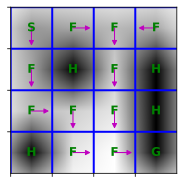

after iteration 6
iter    0   |   diff: 0.00000   |   V(start): 0.590 


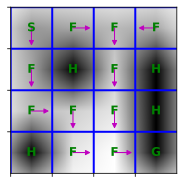

after iteration 7
iter    0   |   diff: 0.00000   |   V(start): 0.590 


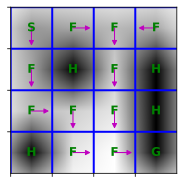

after iteration 8
iter    0   |   diff: 0.00000   |   V(start): 0.590 


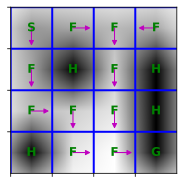

after iteration 9
iter    0   |   diff: 0.00000   |   V(start): 0.590 


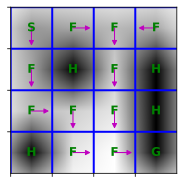

In [39]:
state_values = {s: 0 for s in mdp.get_all_states()}

for i in range(10):
    print("after iteration %i" % i)
    state_values = value_iteration(mdp, state_values, num_iter=1)
    draw_policy(mdp, state_values)
# please ignore iter 0 at each step

after iteration 29
iter    0   |   diff: 0.00000   |   V(start): 0.198 


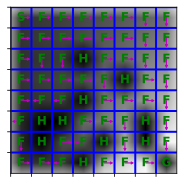

In [40]:
from time import sleep
from IPython.display import clear_output

from mdp import FrozenLakeEnv

mdp = FrozenLakeEnv(map_name='8x8', slip_chance=0.1)
state_values = {s: 0 for s in mdp.get_all_states()}

for i in range(30):
    clear_output(True)
    print("after iteration %i" % i)
    state_values = value_iteration(mdp, state_values, num_iter=1)
    draw_policy(mdp, state_values)
    sleep(0.5)
# please ignore iter 0 at each step

In [41]:
from mdp import FrozenLakeEnv

mdp = FrozenLakeEnv(slip_chance=0)
state_values = value_iteration(mdp)

total_rewards = []
for game_i in range(1000):
    s = mdp.reset()
    rewards = []
    for t in range(100):
        s, r, done, _ = mdp.step(
            get_optimal_action(mdp, state_values, s, gamma))
        rewards.append(r)
        if done:
            break
    total_rewards.append(np.sum(rewards))

print("average reward: ", np.mean(total_rewards))
assert(1.0 <= np.mean(total_rewards) <= 1.0)
print("Well done!")

iter    0   |   diff: 1.00000   |   V(start): 0.000 
iter    1   |   diff: 0.90000   |   V(start): 0.000 
iter    2   |   diff: 0.81000   |   V(start): 0.000 
iter    3   |   diff: 0.72900   |   V(start): 0.000 
iter    4   |   diff: 0.65610   |   V(start): 0.000 
iter    5   |   diff: 0.59049   |   V(start): 0.590 
iter    6   |   diff: 0.00000   |   V(start): 0.590 
average reward:  1.0
Well done!


In [42]:
from mdp import FrozenLakeEnv

# Measure agent's average reward
mdp = FrozenLakeEnv(slip_chance=0.1)
state_values = value_iteration(mdp)

total_rewards = []
for game_i in range(1000):
    s = mdp.reset()
    rewards = []
    for t in range(100):
        s, r, done, _ = mdp.step(
            get_optimal_action(mdp, state_values, s, gamma))
        rewards.append(r)
        if done:
            break
    total_rewards.append(np.sum(rewards))

print("average reward: ", np.mean(total_rewards))
assert(0.8 <= np.mean(total_rewards) <= 0.95)
print("Well done!")

iter    0   |   diff: 0.90000   |   V(start): 0.000 
iter    1   |   diff: 0.72900   |   V(start): 0.000 
iter    2   |   diff: 0.62330   |   V(start): 0.000 
iter    3   |   diff: 0.50487   |   V(start): 0.000 
iter    4   |   diff: 0.40894   |   V(start): 0.000 
iter    5   |   diff: 0.34868   |   V(start): 0.349 
iter    6   |   diff: 0.06529   |   V(start): 0.410 
iter    7   |   diff: 0.05832   |   V(start): 0.468 
iter    8   |   diff: 0.01139   |   V(start): 0.480 
iter    9   |   diff: 0.00764   |   V(start): 0.487 
iter   10   |   diff: 0.00164   |   V(start): 0.489 
iter   11   |   diff: 0.00094   |   V(start): 0.490 
iter   12   |   diff: 0.00022   |   V(start): 0.490 
iter   13   |   diff: 0.00011   |   V(start): 0.490 
iter   14   |   diff: 0.00003   |   V(start): 0.490 
iter   15   |   diff: 0.00001   |   V(start): 0.490 
iter   16   |   diff: 0.00000   |   V(start): 0.490 
average reward:  0.883
Well done!


In [43]:
# Measure agent's average reward
mdp = FrozenLakeEnv(slip_chance=0.25)
state_values = value_iteration(mdp)

total_rewards = []
for game_i in range(1000):
    s = mdp.reset()
    rewards = []
    for t in range(100):
        s, r, done, _ = mdp.step(
            get_optimal_action(mdp, state_values, s, gamma))
        rewards.append(r)
        if done:
            break
    total_rewards.append(np.sum(rewards))

print("average reward: ", np.mean(total_rewards))
assert(0.6 <= np.mean(total_rewards) <= 0.7)
print("Well done!")

iter    0   |   diff: 0.75000   |   V(start): 0.000 
iter    1   |   diff: 0.50625   |   V(start): 0.000 
iter    2   |   diff: 0.39867   |   V(start): 0.000 
iter    3   |   diff: 0.26910   |   V(start): 0.000 
iter    4   |   diff: 0.18164   |   V(start): 0.000 
iter    5   |   diff: 0.14013   |   V(start): 0.140 
iter    6   |   diff: 0.07028   |   V(start): 0.199 
iter    7   |   diff: 0.06030   |   V(start): 0.260 
iter    8   |   diff: 0.02594   |   V(start): 0.285 
iter    9   |   diff: 0.01918   |   V(start): 0.305 
iter   10   |   diff: 0.00858   |   V(start): 0.313 
iter   11   |   diff: 0.00560   |   V(start): 0.319 
iter   12   |   diff: 0.00260   |   V(start): 0.321 
iter   13   |   diff: 0.00159   |   V(start): 0.323 
iter   14   |   diff: 0.00076   |   V(start): 0.324 
iter   15   |   diff: 0.00045   |   V(start): 0.324 
iter   16   |   diff: 0.00022   |   V(start): 0.324 
iter   17   |   diff: 0.00012   |   V(start): 0.325 
iter   18   |   diff: 0.00006   |   V(start): 

In [44]:
# Measure agent's average reward
mdp = FrozenLakeEnv(slip_chance=0.2, map_name='8x8')
state_values = value_iteration(mdp)

total_rewards = []
for game_i in range(1000):
    s = mdp.reset()
    rewards = []
    for t in range(100):
        s, r, done, _ = mdp.step(
            get_optimal_action(mdp, state_values, s, gamma))
        rewards.append(r)
        if done:
            break
    total_rewards.append(np.sum(rewards))

print("average reward: ", np.mean(total_rewards))
assert(0.6 <= np.mean(total_rewards) <= 0.8)
print("Well done!")

iter    0   |   diff: 0.80000   |   V(start): 0.000 
iter    1   |   diff: 0.57600   |   V(start): 0.000 
iter    2   |   diff: 0.41472   |   V(start): 0.000 
iter    3   |   diff: 0.29860   |   V(start): 0.000 
iter    4   |   diff: 0.24186   |   V(start): 0.000 
iter    5   |   diff: 0.19349   |   V(start): 0.000 
iter    6   |   diff: 0.15325   |   V(start): 0.000 
iter    7   |   diff: 0.12288   |   V(start): 0.000 
iter    8   |   diff: 0.09930   |   V(start): 0.000 
iter    9   |   diff: 0.08037   |   V(start): 0.000 
iter   10   |   diff: 0.06426   |   V(start): 0.000 
iter   11   |   diff: 0.05129   |   V(start): 0.000 
iter   12   |   diff: 0.04330   |   V(start): 0.000 
iter   13   |   diff: 0.03802   |   V(start): 0.033 
iter   14   |   diff: 0.03332   |   V(start): 0.058 
iter   15   |   diff: 0.02910   |   V(start): 0.087 
iter   16   |   diff: 0.01855   |   V(start): 0.106 
iter   17   |   diff: 0.01403   |   V(start): 0.120 
iter   18   |   diff: 0.00810   |   V(start): 

# Home-work: Policy Iteration

Let's implement exact policy iteration (PI), which has the following pseudocode:

----
1. Initialize $\pi_0(s)$ with random or fixed actions   
2. For $ n = 0, 1, 2, ... $
  1.      Compute the state-value function $V^{\pi_n}$
  2.      Using $V^{\pi_n}$, compute the state-action-value function $Q^{\pi_n}$
  3.      Compute new policy $ \pi_{n+1}(s) = arg \max_a Q^{\pi_n}(s,a)$
----

Unlike VI, policy iteration has to maintain a policy - chosen actions from all states - and estimate $V^{\pi_{n}}$ based on this policy. It only changes policy once values converged.

Below are a few helpers that you may or may not use in your implementation.

In [53]:
from mdp import MDP

transition_probs = {
    's0': {
        'a0': {'s0': 0.5, 's2': 0.5},
        'a1': {'s2': 1}
    },
    's1': {
        'a0': {'s0': 0.7, 's1': 0.1, 's2': 0.2},
        'a1': {'s1': 0.95, 's2': 0.05}
    },
    's2': {
        'a0': {'s0': 0.4, 's1': 0.6},
        'a1': {'s0': 0.3, 's1': 0.3, 's2': 0.4}
    }
}
rewards = {
    's1': {'a0': {'s0': +5}},
    's2': {'a1': {'s0': -1}}
}

mdp = MDP(transition_probs, rewards, initial_state='s0')

Let's write a function called compute_vpi that computes the state-value function $V^{\pi}$ for an arbitrary policy $\pi$.

Unlike VI, this time you must find the exact solution, not just a single iteration.

Recall that $V^{\pi}$ satisfies the following linear equation: $$V^{\pi}(s) = \sum_{s'} P(s,\pi(s),s')[ R(s,\pi(s),s') + \gamma V^{\pi}(s')]$$

You'll have to solve a linear system in your code. (Find an exact solution, e.g., with np.linalg.solve.)

In [46]:
d = {1 : 2}
d[1]

2

In [47]:
def compute_vpi(mdp, policy, gamma):
  """
  Computes V^pi(s) FOR ALL STATES under given policy.
  :param policy: a dict of currently chosen actions {s : a}
  :returns: a dict {state : V^pi(state) for all states}
  """
  V = {}
  
  for state in mdp.get_all_states():
      if state in policy:
          action = policy[state]
          V[state] = sum(mdp.get_transition_prob(state, action, next_state) *
                          (mdp.get_reward(state, action, next_state) + gamma * V.get(next_state, 0))
                          for next_state in mdp.get_all_states())
      else:
          V[state] = 0
  return V





In [48]:
test_policy = {s: np.random.choice(
    mdp.get_possible_actions(s)) for s in mdp.get_all_states()}
new_vpi = compute_vpi(mdp, test_policy, gamma)

print(new_vpi)

assert type(
    new_vpi) is dict, "compute_vpi must return a dict {state : V^pi(state) for all states}"

{'s0': 0.0, 's1': 0.0, 's2': -0.3}



Once we've got new state values, it's time to update our policy.

In [49]:
def compute_new_policy(mdp, vpi, gamma):
  """
  Computes new policy as argmax of state values
  :param vpi: a dict {state : V^pi(state) for all states}
  :returns: a dict {state : optimal action for all states}
  """
  new_policy = {}
  
  for state in mdp.get_all_states():
      best_action = None
      best_action_value = float("-inf")
      for action in mdp.get_possible_actions(state):
          action_value = sum(mdp.get_transition_prob(state, action, next_state) *
                             (mdp.get_reward(state, action, next_state) + gamma * vpi[next_state])
                             for next_state in mdp.get_all_states())
          if action_value > best_action_value:
              best_action = action
              best_action_value = action_value
      new_policy[state] = best_action
      
  return new_policy


In [50]:
new_policy = compute_new_policy(mdp, new_vpi, gamma)

print(new_policy)

assert type(
    new_policy) is dict, "compute_new_policy must return a dict {state : optimal action for all states}"

{'s0': 'a0', 's1': 'a0', 's2': 'a0'}


## Main loop

In [51]:
def policy_iteration(mdp, policy=None, gamma=0.9, num_iter=1000, min_difference=1e-5):
  """
  Run the policy iteration loop for num_iter iterations or till difference between V(s) is below min_difference.
  If policy is not given, initialize it at random.
  """
  if policy is None:
      policy = {state: np.random.choice(len(mdp.get_possible_actions(state))) for state in mdp.get_all_states()}
  for _ in range(num_iter):
      state_values = compute_vpi(mdp, policy, gamma)
      new_policy = compute_new_policy(mdp, state_values, gamma)
      if policy == new_policy:
          break
      policy = new_policy
      
  return state_values, policy


## Your PI Results